In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wrangle import get_codeup_data
from wrangle import combine_codeup_data
from wrangle import null_filler

# ACQUIRE
I will acquire the data for this project using __get_codeup_data__ function from my __wrangle.py__ file.
***

In [2]:
# using function to acquire data
logs, cohorts = get_codeup_data()

In [3]:
# previewing logs data
logs.head(2)

,date,time,page_viewed,user_id,cohort_id,ip
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61


In [4]:
# previewing cohorts data
cohorts.head(2)

,cohort_id,name,start_date,end_date,program_id
0,1,Arches,2014-02-04,2014-04-22,1
1,2,Badlands,2014-06-04,2014-08-22,1


# PREPARE
I will prepare the data for the exploration necessary to answer the various questions I was asked.
***

### Combine the data from the two separate DFs using the __combine_codeup_data__ function from my __wrangle.py__ file.

In [5]:
# combining DFs using function from local wrangle.py file
df = combine_codeup_data(logs, cohorts)

In [6]:
# previewing data 
df.head()

,page_viewed,user_id,cohort_id,ip,name,start_date,end_date,program_id
datetime,,,,,,,,
2018-01-26 09:55:03,/,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1.0
2018-01-26 09:56:02,java-ii,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1.0
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1.0
2018-01-26 09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1.0
2018-01-26 09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,Teddy,2018-01-08,2018-05-17,2.0


### I'm going to use .info to check if the column data types are appropriate and if there are any null values

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 719459 entries, 2018-01-26 09:55:03 to 2020-11-02 16:48:47
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   page_viewed  719458 non-null  object 
 1   user_id      719459 non-null  int64  
 2   cohort_id    674619 non-null  float64
 3   ip           719459 non-null  object 
 4   name         674619 non-null  object 
 5   start_date   674619 non-null  object 
 6   end_date     674619 non-null  object 
 7   program_id   674619 non-null  float64
dtypes: float64(2), int64(1), object(5)
memory usage: 49.4+ MB


- __Update data types if necessary for later work__
- Update missing values with special values that distinguish them from non-nulls
    - page_viewed: PageUnknown
    - cohort_id: 0
    - name: unknown
    - start_date and end_date: 01-01-1900
    - program_id: 0
- Change start_date and end_date data types to datetime

### I'm going to use my null_filler function from my wrangle.py file to fill null values with the values specified above.

In [28]:
# Using function from wrangle file to fill null values
null_filler(df)

### I'm going to change the start_date and end_date column data types to datetime.

In [9]:
# using to_datetime to convert start and end date columns to datetime format
df.start_date = pd.to_datetime(df.start_date)
df.end_date = pd.to_datetime(df.end_date)

In [29]:
# Checking to confirm if all nulls are removed and date column data types are converted
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 719459 entries, 2018-01-26 09:55:03 to 2020-11-02 16:48:47
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   page_viewed  719459 non-null  object        
 1   user_id      719459 non-null  int64         
 2   cohort_id    719459 non-null  float64       
 3   ip           719459 non-null  object        
 4   name         719459 non-null  object        
 5   start_date   719459 non-null  datetime64[ns]
 6   end_date     719459 non-null  datetime64[ns]
 7   program_id   719459 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(3)
memory usage: 49.4+ MB


### I'm going to split the data science, web development, and unknown cohorts into separate DFs to make exploring them separately easier.

First I'll need to identify which program IDs belong with web development and which belong to data science.

I'll do this by cross-referencing the cohorts featured at <https://alumni.codeup.com> with the name column in my DF and take note of their program IDs.

In [11]:
# filtering for an Andromeda cohort row to see what program ID it is associated with
df[df.name == 'Andromeda'].head(1)

,page_viewed,user_id,cohort_id,ip,name,start_date,end_date,program_id
datetime,,,,,,,,
2019-03-18 16:01:40,assets/js/pdfmake.min.js.map,373,31.0,97.105.19.58,Andromeda,2019-03-18,2019-07-30,2.0


Andromeda is a web dev cohort.

program_id 2 indicates a web dev cohort.

In [12]:
# filtering for an Arches cohort row to see what program ID it is associated with
df[df.name == 'Arches'].head(1)

,page_viewed,user_id,cohort_id,ip,name,start_date,end_date,program_id
datetime,,,,,,,,
2018-01-26 10:14:47,/,11,1.0,97.105.19.61,Arches,2014-02-04,2014-04-22,1.0


Arches is a web dev cohort.

program_id 1 indicates a web dev cohort.

In [13]:
# filtering for an Apollo cohort row to see what program ID it is associated with
df[df.name == 'Apollo'].head(1)

,page_viewed,user_id,cohort_id,ip,name,start_date,end_date,program_id
datetime,,,,,,,,
2018-03-22 19:01:49,/,152,9.0,207.68.209.17,Apollo,2015-03-30,2015-07-29,4.0


Apollo is a web dev cohort.

program_id 4 indicates a web dev cohort.

In [14]:
# filtering for a Darden cohort row to see what program ID it is associated with
df[df.name == 'Darden'].head(1)

,page_viewed,user_id,cohort_id,ip,name,start_date,end_date,program_id
datetime,,,,,,,,
2020-07-13 14:34:44,/,678,59.0,76.201.20.193,Darden,2020-07-13,2021-01-12,3.0


Darden is a web dev cohort.

Program_id 3 indicates a Data Science cohort.

### After cross-referencing the cohorts featured at <https://alumni.codeup.com> with the name column in my DF, I was able to determine that
 - Web development cohorts correspond with program IDs 1, 2 and 4
 - Data science cohorts correspond with program ID 3

### Now that I know what program IDs correspond to web dev and DS cohorts, I can split them accordingly.

In [15]:
# creating web dev DF 
# a "staff" cohort was found during exploration, removing from WD data frame
wd = df[(df.program_id == 1) | ((df.program_id == 2) & (df.name != 'Staff')) | (df.program_id == 4)]

# creating data science DF
ds = df[df.program_id == 3]

# creating DF for unknown cohort rows
unk = df[df.program_id == 0]

## Prepare Takeaways
- Data prepared for exploration via
    - Merging data from separate source files
    - Filling null values
    - Splitting complete data frame into separate cohort data frames
        - web development
        - data science
        - unknown cohort
            - If time permits, I will return to the unknown cohort DF and attempt to decipher if any of its users belong in the web dev or DS dataframes so that their data can be used in exploration

# EXPLORE
I'm going to explore the data in order to answer the various questions I was presented with.
***

# Question 1 - Which lesson appears to attract the most traffic consistently across cohorts?

I'm going to answer this by creating a DF that shows the average amount of times each page was viewed by each cohort. I'll then sort the values by the average number of views and identify the top 3 most popular lessons.

## Q1 -  Web Development

In [16]:
# creating a crosstab of page_viewed and cohort name
wd_avg_views = pd.crosstab(wd.page_viewed, wd.name)

# creating new column that holds the average amount of times each cohort has visited a page
wd_avg_views['avg_views_per_cohort'] = wd_avg_views.mean(axis=1)

# sorting by avg_views_per_cohort column
wd_avg_views.sort_values(by='avg_views_per_cohort', ascending=False, inplace = True)

# viewing top 10
wd_avg_views[['avg_views_per_cohort']].head(10)

name,avg_views_per_cohort
page_viewed,
/,723.194444
toc,355.333333
javascript-i,351.083333
search/search_index.json,310.416667
java-iii,269.500000
html-css,260.722222
java-ii,252.000000
spring,244.027778
jquery,228.638889


## Q1 - Data Science

In [17]:
# creating a crosstab of page_viewed and cohort name
ds_avg_views = pd.crosstab(ds.page_viewed, ds.name)

# creating new column that holds the average amount of times each cohort has visited a page
ds_avg_views['avg_views_per_cohort'] = ds_avg_views.mean(axis=1)

# sorting by avg_views_per_cohort column
ds_avg_views.sort_values(by='avg_views_per_cohort', ascending=False, inplace = True)

# viewing top 10
ds_avg_views[['avg_views_per_cohort']].head(10)

name,avg_views_per_cohort
page_viewed,
/,1802.000000
1-fundamentals/modern-data-scientist.jpg,521.000000
1-fundamentals/AI-ML-DL-timeline.jpg,519.666667
1-fundamentals/1.1-intro-to-data-science,512.000000
search/search_index.json,443.666667
6-regression/1-overview,374.333333
classification/overview,286.666667
10-anomaly-detection/AnomalyDetectionCartoon.jpeg,248.333333
10-anomaly-detection/1-overview,247.333333


## QUESTION 1 - ANSWERS

### Web Development
The most visited lesson page on average across all web development cohorts is __<ins>Javascript-I</ins>__
    
### Data Science
The lesson page with the most views on average across all data science cohorts is __<ins>1-fundamentals/1.1-intro-to-data-science</ins>__.
    
#### Note
The top page, " / ", was not counted since it's not a lesson.

# Question 2 -  Is there a cohort that referred to a lesson significantly more that other cohorts seemed to gloss over? 
explanation##################

## Q2 - Web Development

In [18]:
# creating a crosstab of page_viewed and cohort name
wd_sum_views = pd.crosstab(wd.page_viewed, wd.name)

# creating new column that holds the average amount of times each cohort has visited a page
wd_sum_views['sum_views_per_cohort'] = wd_sum_views.sum(axis=1)

# sorting by sum_views_per_cohort column
wd_sum_views.sort_values(by='sum_views_per_cohort', ascending=False, inplace = True)

# viewing top 10
wd_sum_views[['sum_views_per_cohort']].head(15)

name,sum_views_per_cohort
page_viewed,
/,26035
toc,12792
javascript-i,12639
search/search_index.json,11175
java-iii,9702
html-css,9386
java-ii,9072
spring,8785
jquery,8231


In [19]:
high_wd_view_cols = ['javascript-i', 'java-iii', 'html-css', 'java-ii', 'spring']

wd_popular_lesson_views = wd[wd.page_viewed.isin(high_wd_view_cols)]

wd_popular_lesson_views

,page_viewed,user_id,cohort_id,ip,name,start_date,end_date,program_id
datetime,,,,,,,,
2018-01-26 09:56:02,java-ii,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1.0
2018-01-26 10:00:39,javascript-i,6,22.0,97.105.19.61,Teddy,2018-01-08,2018-05-17,2.0
2018-01-26 10:14:51,javascript-i,11,1.0,97.105.19.61,Arches,2014-02-04,2014-04-22,1.0
2018-01-26 10:15:23,javascript-i,6,22.0,97.105.19.61,Teddy,2018-01-08,2018-05-17,2.0
2018-01-26 10:18:24,spring,10,21.0,97.105.19.61,Sequoia,2017-09-27,2018-02-15,2.0
...,...,...,...,...,...,...,...,...
2020-11-02 15:42:05,java-iii,733,61.0,107.77.220.169,Bash,2020-07-20,2021-01-21,2.0
2020-11-02 16:04:19,java-iii,733,61.0,107.77.220.169,Bash,2020-07-20,2021-01-21,2.0
2020-11-02 16:13:52,java-iii,747,61.0,70.125.129.102,Bash,2020-07-20,2021-01-21,2.0


In [20]:
wd_popular_lesson_views_ct = pd.crosstab(wd_popular_lesson_views.name, wd_popular_lesson_views.page_viewed)

wd_popular_lesson_views_ct.columns = ['Page Views for "HTML-CSS"', 'Page Views for "Java-II"', 'Page Views for "Java-III"', 'Page Views for "Javascript-I"', 'Page Views for "Spring"' ]

wd_popular_lesson_views_ct.head()

,"Page Views for ""HTML-CSS""","Page Views for ""Java-II""","Page Views for ""Java-III""","Page Views for ""Javascript-I""","Page Views for ""Spring"""
name,,,,,
Andromeda,372,395,430,509,485
Apex,708,595,616,610,572
Arches,215,167,153,294,192
Badlands,2,0,0,1,0
Bash,214,190,72,319,29


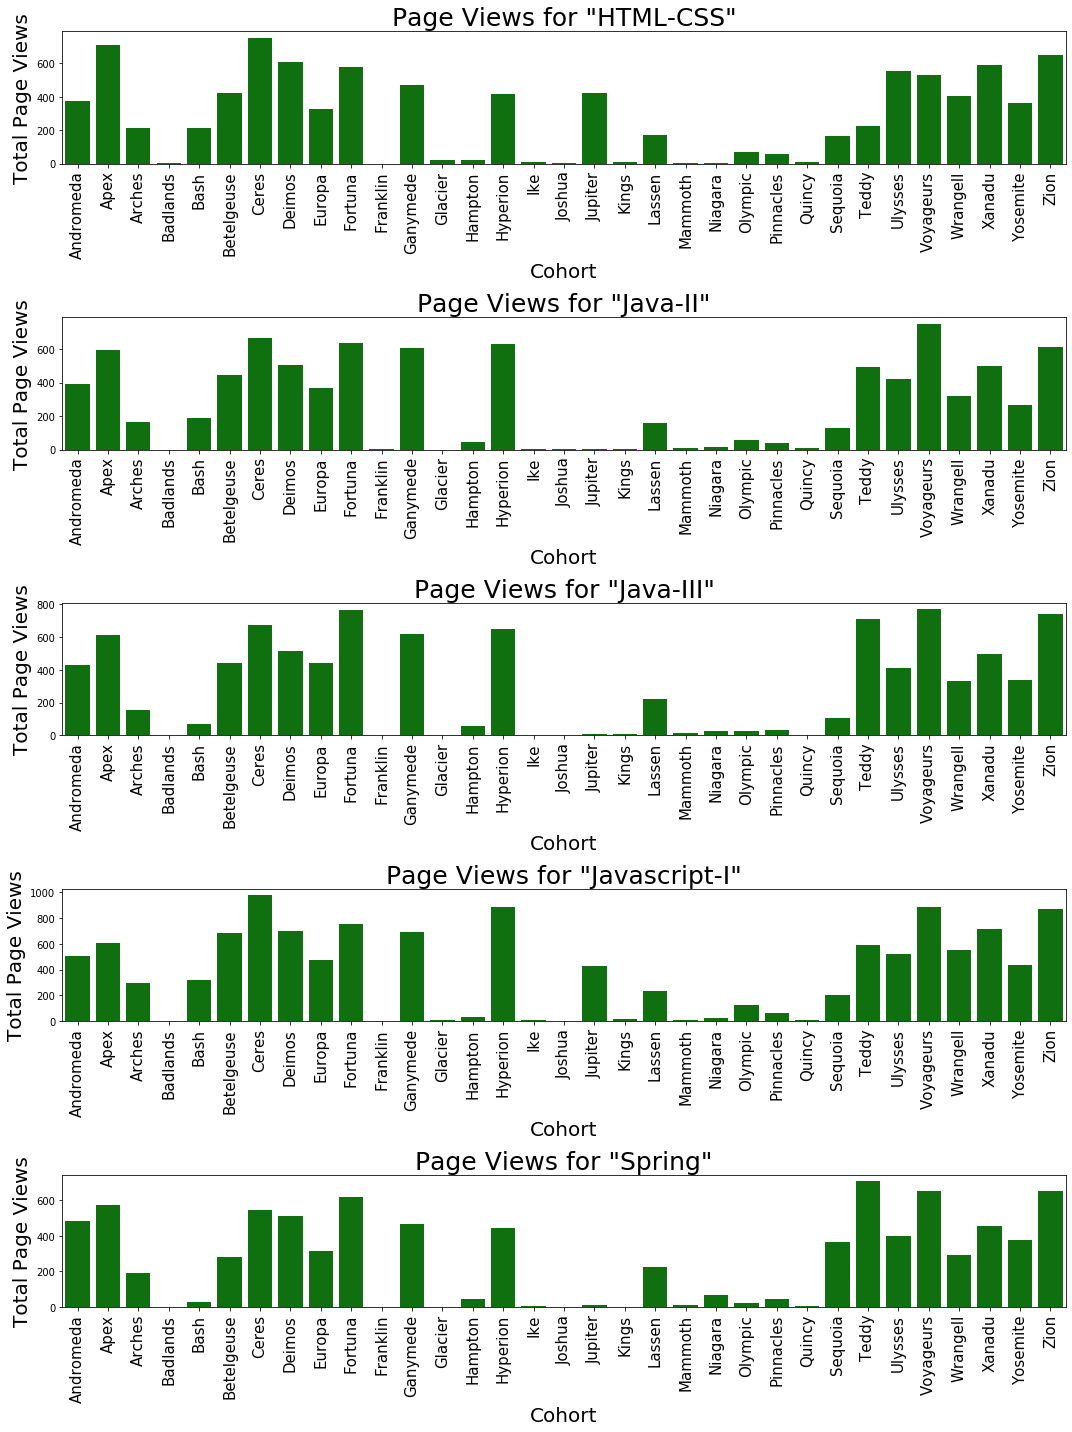

In [21]:
x = 1
plt.figure(figsize=(15,20))

for col in wd_popular_lesson_views_ct.columns:
    plt.subplot(5,1,x)
    x = x + 1
    sns.barplot(x = wd_popular_lesson_views_ct.index, y = wd_popular_lesson_views_ct[col], color = 'Green')
    plt.xticks(rotation=90, fontsize = 15)
    plt.title(col,fontsize = 25)
    plt.xlabel('Cohort', fontsize = 20)
    plt.ylabel('Total Page Views', fontsize = 20)
    
plt.tight_layout()

## Q2 - Data Science

In [22]:
# creating a crosstab of page_viewed and cohort name
ds_sum_views = pd.crosstab(ds.page_viewed, ds.name)

# creating new column that holds the average amount of times each cohort has visited a page
ds_sum_views['sum_views_per_cohort'] = ds_sum_views.sum(axis=1)

# sorting by sum_views_per_cohort column
ds_sum_views.sort_values(by='sum_views_per_cohort', ascending=False, inplace = True)

# viewing top 10
ds_sum_views[['sum_views_per_cohort']].head(10)

name,sum_views_per_cohort
page_viewed,
/,5406
1-fundamentals/modern-data-scientist.jpg,1563
1-fundamentals/AI-ML-DL-timeline.jpg,1559
1-fundamentals/1.1-intro-to-data-science,1536
search/search_index.json,1331
6-regression/1-overview,1123
classification/overview,860
10-anomaly-detection/AnomalyDetectionCartoon.jpeg,745
10-anomaly-detection/1-overview,742


In [23]:
high_ds_view_cols = ['1-fundamentals/1.1-intro-to-data-science', '6-regression/1-overview', 'classification/overview', '10-anomaly-detection/1-overview', '3-sql/1-mysql-overview']

ds_popular_lesson_views = ds[ds.page_viewed.isin(high_ds_view_cols)]

ds_popular_lesson_views

,page_viewed,user_id,cohort_id,ip,name,start_date,end_date,program_id
datetime,,,,,,,,
2019-08-20 09:40:28,3-sql/1-mysql-overview,470,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,3.0
2019-08-20 09:41:02,1-fundamentals/1.1-intro-to-data-science,469,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,3.0
2019-08-20 09:41:28,1-fundamentals/1.1-intro-to-data-science,480,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,3.0
2019-08-20 09:41:36,1-fundamentals/1.1-intro-to-data-science,482,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,3.0
2019-08-20 09:42:10,1-fundamentals/1.1-intro-to-data-science,472,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,3.0
...,...,...,...,...,...,...,...,...
2020-11-02 13:37:41,classification/overview,685,59.0,99.76.233.212,Darden,2020-07-13,2021-01-12,3.0
2020-11-02 13:42:46,classification/overview,696,59.0,67.11.85.236,Darden,2020-07-13,2021-01-12,3.0
2020-11-02 15:20:32,classification/overview,685,59.0,99.76.233.212,Darden,2020-07-13,2021-01-12,3.0


In [24]:
ds_popular_lesson_views_ct = pd.crosstab(ds_popular_lesson_views.name, ds_popular_lesson_views.page_viewed)

ds_popular_lesson_views_ct.columns = ['Page Views for "Intro to Data Science"', 'Page Views for "Regression Overview"', 'Page Views for "Classification Overview"', 'Page Views for "Anomaly-Detection Overview"', 'Page Views for "Sql/Mysql Overview"']

ds_popular_lesson_views_ct.head()

,"Page Views for ""Intro to Data Science""","Page Views for ""Regression Overview""","Page Views for ""Classification Overview""","Page Views for ""Anomaly-Detection Overview""","Page Views for ""Sql/Mysql Overview"""
name,,,,,
Bayes,615,383,142,521,10
Curie,461,345,441,595,91
Darden,460,14,121,7,759


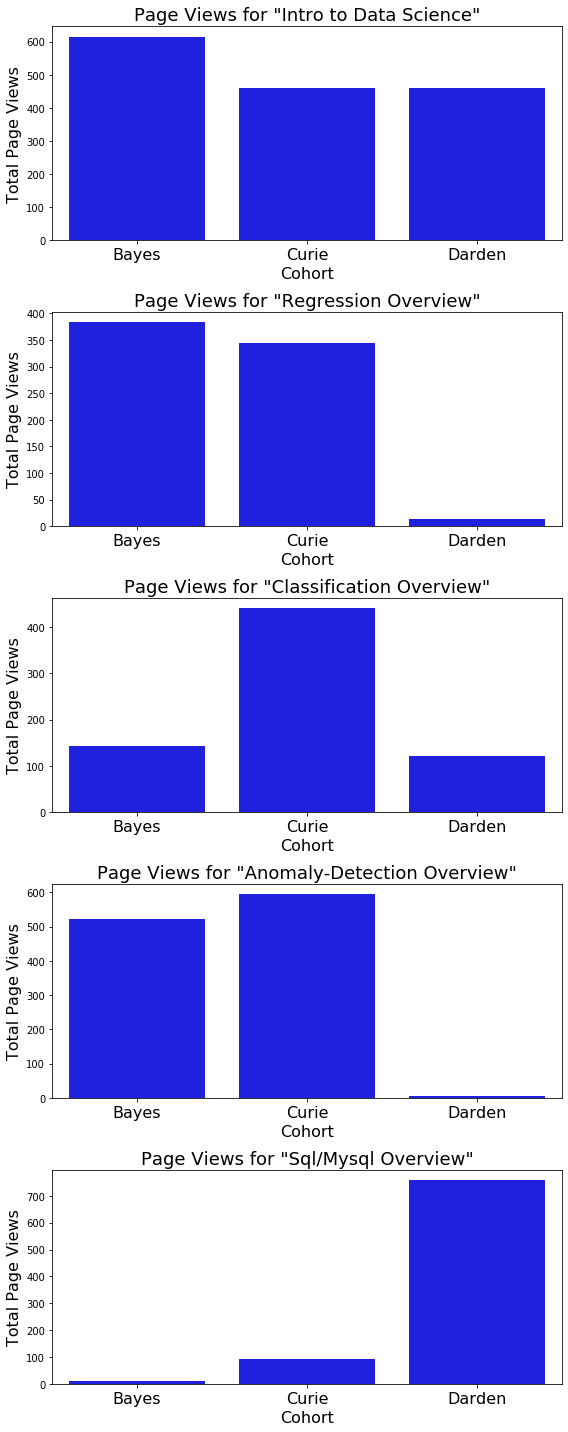

In [25]:
x = 1
plt.figure(figsize=(8,20))

for col in ds_popular_lesson_views_ct.columns:
    plt.subplot(5,1,x)
    x = x + 1
    sns.barplot(x = ds_popular_lesson_views_ct.index, y = ds_popular_lesson_views_ct[col],color='Blue')
    plt.xticks(fontsize = 16)
    plt.title(col, fontsize = 18, y=1)
    plt.xlabel('Cohort', fontsize = 16)
    plt.ylabel('Total Page Views', fontsize = 16)
    
plt.tight_layout()

# QUESTION 2 - Answers

### Web Development

### Data Science

I found 2 pages that were visited significantly more by one cohort than the others.
- __Curie__ visited the __SQL overview__ page roughly 300 more times than Darden or Bayes
- __Darden__ visited the __classification overview__ page roughly 600 more times than Curie or Bayes

# Question 3 - Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students? 
To answer this question I'm going to filter the dataframes down to rows where the student is accessing a page while they are an active student (ie. date of activity is within start and end date values). Afterwards, I'll look for students who have relatively low web page views and gather information about them.

## Q3 - Web Development

In [220]:
active_wd = wd[(wd.index >= wd.start_date) & (wd.index <= wd.end_date)]

active_wd.groupby('user_id')['page_viewed'].count().sort_values().head(3)

user_id
619    1
278    4
539    5
Name: page_viewed, dtype: int64

### User 619

In [132]:
active_wd[active_wd.user_id==619]

,page_viewed,user_id,cohort_id,ip,name,start_date,end_date,program_id
datetime,,,,,,,,
2020-03-23 14:10:17,/,619,57.0,97.105.19.58,Ganymede,2020-03-23,2020-08-20,2.0


In [146]:
wd[wd.user_id==619]

,page_viewed,user_id,cohort_id,ip,name,start_date,end_date,program_id
datetime,,,,,,,,
2020-03-23 14:10:17,/,619,57.0,97.105.19.58,Ganymede,2020-03-23,2020-08-20,2.0


In [156]:
wd[wd.ip == '97.105.19.58']['user_id'].value_counts()

53     4436
344    2621
314    2615
315    2382
418    1953
       ... 
626       1
624       1
622       1
621       1
629       1
Name: user_id, Length: 328, dtype: int64

### Observations about user 619's activity
- Only accessed site once while their cohort was active
    - Page was accessed on first day of class
    - Only page accessed was homepage, " / "
- Never accessed any pages while their cohort was inactive
- User's IP was used by 328 other users

Given that they only accessed the homepage on the first day of class and many other students share their IP, perhaps this was a student who had to have their user ID changed on the first day of class. Given the sparse amount of information I have about this user, it's difficult to discern what their new user ID may be.

### User 278

In [131]:
active_wd[active_wd.user_id==278]

,page_viewed,user_id,cohort_id,ip,name,start_date,end_date,program_id
datetime,,,,,,,,
2018-09-27 13:57:44,/,278,24.0,97.105.19.58,Voyageurs,2018-05-29,2018-10-11,2.0
2018-09-27 14:47:37,java-ii/arrays,278,24.0,107.77.217.9,Voyageurs,2018-05-29,2018-10-11,2.0
2018-09-27 14:58:48,java-ii/arrays,278,24.0,107.77.217.9,Voyageurs,2018-05-29,2018-10-11,2.0
2018-09-27 14:59:07,java-ii/collections,278,24.0,107.77.217.9,Voyageurs,2018-05-29,2018-10-11,2.0


In [170]:
wd[wd.user_id==278].sort_index(ascending=False)

,page_viewed,user_id,cohort_id,ip,name,start_date,end_date,program_id
datetime,,,,,,,,
2019-02-09 17:58:51,mysql/databases,278,24.0,67.11.175.66,Voyageurs,2018-05-29,2018-10-11,2.0
2019-02-09 17:58:08,mysql/tables,278,24.0,67.11.175.66,Voyageurs,2018-05-29,2018-10-11,2.0
2019-02-09 17:37:19,mysql/basic-statements,278,24.0,67.11.175.66,Voyageurs,2018-05-29,2018-10-11,2.0
2019-02-09 17:35:43,mysql/tables,278,24.0,67.11.175.66,Voyageurs,2018-05-29,2018-10-11,2.0
2019-02-09 17:31:50,mysql/introduction,278,24.0,67.11.175.66,Voyageurs,2018-05-29,2018-10-11,2.0
...,...,...,...,...,...,...,...,...
2018-10-16 18:55:42,/,278,24.0,67.11.175.66,Voyageurs,2018-05-29,2018-10-11,2.0
2018-09-27 14:59:07,java-ii/collections,278,24.0,107.77.217.9,Voyageurs,2018-05-29,2018-10-11,2.0
2018-09-27 14:58:48,java-ii/arrays,278,24.0,107.77.217.9,Voyageurs,2018-05-29,2018-10-11,2.0


In [155]:
wd[wd.user_id==278]['ip'].value_counts()

67.11.175.66    64
107.77.217.9     3
97.105.19.58     1
Name: ip, dtype: int64

In [172]:
active_wd[active_wd.ip == '107.77.217.9']

,page_viewed,user_id,cohort_id,ip,name,start_date,end_date,program_id
datetime,,,,,,,,
2018-09-27 14:47:37,java-ii/arrays,278,24.0,107.77.217.9,Voyageurs,2018-05-29,2018-10-11,2.0
2018-09-27 14:58:48,java-ii/arrays,278,24.0,107.77.217.9,Voyageurs,2018-05-29,2018-10-11,2.0
2018-09-27 14:59:07,java-ii/collections,278,24.0,107.77.217.9,Voyageurs,2018-05-29,2018-10-11,2.0


In [154]:
wd[wd.ip == '67.11.175.66']['user_id'].value_counts()

196    256
278     64
Name: user_id, dtype: int64

In [171]:
wd[wd.user_id==196]

,page_viewed,user_id,cohort_id,ip,name,start_date,end_date,program_id
datetime,,,,,,,,
2018-05-29 14:42:50,/,196,24.0,97.105.19.61,Voyageurs,2018-05-29,2018-10-11,2.0
2018-05-30 01:22:48,html-css,196,24.0,67.11.175.66,Voyageurs,2018-05-29,2018-10-11,2.0
2018-05-30 01:23:08,html-css/introduction,196,24.0,67.11.175.66,Voyageurs,2018-05-29,2018-10-11,2.0
2018-05-30 01:23:14,html-css/elements,196,24.0,67.11.175.66,Voyageurs,2018-05-29,2018-10-11,2.0
2018-05-30 01:23:25,html-css/forms,196,24.0,67.11.175.66,Voyageurs,2018-05-29,2018-10-11,2.0
...,...,...,...,...,...,...,...,...
2018-09-27 13:56:45,java-i/methods,196,24.0,97.105.19.58,Voyageurs,2018-05-29,2018-10-11,2.0
2018-09-27 13:56:57,java-ii,196,24.0,97.105.19.58,Voyageurs,2018-05-29,2018-10-11,2.0
2018-09-27 13:56:59,java-ii/object-oriented-programming,196,24.0,97.105.19.58,Voyageurs,2018-05-29,2018-10-11,2.0


In [158]:
wd[wd.ip == '97.105.19.58']['user_id'].value_counts()

53     4436
344    2621
314    2615
315    2382
418    1953
       ... 
626       1
624       1
622       1
621       1
629       1
Name: user_id, Length: 328, dtype: int64

### Observations about user 278's activity
- Only accessed site 4 times while their cohort was active
    - Pages were accessed roughly one month prior to end of cohort
    - Pages accessed were homepage and Java-II pages
- Accessed site 64 times after cohort became inactive
- User used 3 different IPs
    - One IP was used to access the Java Pages while cohort was active 
    - Another IP is the same one that user 619 and over 300 other users have used
        - It was used to access the homepage once while cohort was active
    - The last IP was used to access site after cohort ended
        - This IP was used throughout the cohort by user 196 while the cohort was active

In summary, the user only accessed the site 4 times near the end of their cohort. After their cohort ended, the user accessed the site roughly 60 more times. One of the user's IPs was used by user 196 throughout the cohort while it was active. These points suggest that user 278 is an alternate user account for user 196. 

### User 539

In [118]:
active_wd[active_wd.user_id == 539]

,page_viewed,user_id,cohort_id,ip,name,start_date,end_date,program_id
datetime,,,,,,,,
2019-11-04 16:19:26,/,539,52.0,97.105.19.58,Europa,2019-11-04,2020-04-17,2.0
2019-11-04 16:19:34,toc,539,52.0,97.105.19.58,Europa,2019-11-04,2020-04-17,2.0
2019-11-04 16:54:02,html-css,539,52.0,97.105.19.58,Europa,2019-11-04,2020-04-17,2.0
2019-11-04 16:54:38,html-css/introduction,539,52.0,97.105.19.58,Europa,2019-11-04,2020-04-17,2.0
2019-11-04 16:54:45,html-css/elements,539,52.0,97.105.19.58,Europa,2019-11-04,2020-04-17,2.0


In [174]:
wd[wd.user_id == 539].sort_index(ascending=False)

,page_viewed,user_id,cohort_id,ip,name,start_date,end_date,program_id
datetime,,,,,,,,
2019-11-04 16:54:45,html-css/elements,539,52.0,97.105.19.58,Europa,2019-11-04,2020-04-17,2.0
2019-11-04 16:54:38,html-css/introduction,539,52.0,97.105.19.58,Europa,2019-11-04,2020-04-17,2.0
2019-11-04 16:54:02,html-css,539,52.0,97.105.19.58,Europa,2019-11-04,2020-04-17,2.0
2019-11-04 16:19:34,toc,539,52.0,97.105.19.58,Europa,2019-11-04,2020-04-17,2.0
2019-11-04 16:19:26,/,539,52.0,97.105.19.58,Europa,2019-11-04,2020-04-17,2.0


In [176]:
wd[wd.ip == '97.105.19.58']['user_id'].value_counts()

53     4436
344    2621
314    2615
315    2382
418    1953
       ... 
626       1
624       1
622       1
621       1
629       1
Name: user_id, Length: 328, dtype: int64

### Observations about user 539's activity
- Only accessed site 5 times while their cohort was active
    - Pages were accessed on first day of class
- Never accessed any pages while their cohort was inactive
- User's IP was shared by 328 other users

Given that they only accessed a few pages on the first day of class and many other students share their IP, this may be a student who had user ID changed early in the cohort. Given the sparse amount of information I have about this user, it's difficult to discern what their new user ID may be.

## Q3 - Data Science

In [177]:
active_ds = ds[(ds.index >= ds.start_date) & (ds.index <= ds.end_date)]

active_ds.groupby('user_id')['page_viewed'].count().sort_values().head(3)

user_id
679    11
697    13
487    17
Name: page_viewed, dtype: int64

### User 679

In [180]:
active_ds[active_ds.user_id == 679]

,page_viewed,user_id,cohort_id,ip,name,start_date,end_date,program_id
datetime,,,,,,,,
2020-07-13 14:37:22,/,679,59.0,24.28.146.155,Darden,2020-07-13,2021-01-12,3.0
2020-07-13 14:39:21,13-advanced-topics/1-tidy-data,679,59.0,24.28.146.155,Darden,2020-07-13,2021-01-12,3.0
2020-07-13 14:39:36,1-fundamentals/1.1-intro-to-data-science,679,59.0,24.28.146.155,Darden,2020-07-13,2021-01-12,3.0
2020-07-13 14:39:37,1-fundamentals/AI-ML-DL-timeline.jpg,679,59.0,24.28.146.155,Darden,2020-07-13,2021-01-12,3.0
2020-07-13 14:39:37,1-fundamentals/modern-data-scientist.jpg,679,59.0,24.28.146.155,Darden,2020-07-13,2021-01-12,3.0
2020-07-13 15:49:31,1-fundamentals/1.1-intro-to-data-science,679,59.0,24.28.146.155,Darden,2020-07-13,2021-01-12,3.0
2020-07-13 15:49:32,1-fundamentals/modern-data-scientist.jpg,679,59.0,24.28.146.155,Darden,2020-07-13,2021-01-12,3.0
2020-07-13 15:49:32,1-fundamentals/AI-ML-DL-timeline.jpg,679,59.0,24.28.146.155,Darden,2020-07-13,2021-01-12,3.0
2020-07-14 08:05:15,1-fundamentals/1.1-intro-to-data-science,679,59.0,24.28.146.155,Darden,2020-07-13,2021-01-12,3.0


In [181]:
ds[ds.user_id == 679]

,page_viewed,user_id,cohort_id,ip,name,start_date,end_date,program_id
datetime,,,,,,,,
2020-07-13 14:37:22,/,679,59.0,24.28.146.155,Darden,2020-07-13,2021-01-12,3.0
2020-07-13 14:39:21,13-advanced-topics/1-tidy-data,679,59.0,24.28.146.155,Darden,2020-07-13,2021-01-12,3.0
2020-07-13 14:39:36,1-fundamentals/1.1-intro-to-data-science,679,59.0,24.28.146.155,Darden,2020-07-13,2021-01-12,3.0
2020-07-13 14:39:37,1-fundamentals/AI-ML-DL-timeline.jpg,679,59.0,24.28.146.155,Darden,2020-07-13,2021-01-12,3.0
2020-07-13 14:39:37,1-fundamentals/modern-data-scientist.jpg,679,59.0,24.28.146.155,Darden,2020-07-13,2021-01-12,3.0
2020-07-13 15:49:31,1-fundamentals/1.1-intro-to-data-science,679,59.0,24.28.146.155,Darden,2020-07-13,2021-01-12,3.0
2020-07-13 15:49:32,1-fundamentals/modern-data-scientist.jpg,679,59.0,24.28.146.155,Darden,2020-07-13,2021-01-12,3.0
2020-07-13 15:49:32,1-fundamentals/AI-ML-DL-timeline.jpg,679,59.0,24.28.146.155,Darden,2020-07-13,2021-01-12,3.0
2020-07-14 08:05:15,1-fundamentals/1.1-intro-to-data-science,679,59.0,24.28.146.155,Darden,2020-07-13,2021-01-12,3.0


In [184]:
ds[ds.ip == '24.28.146.155'].user_id.value_counts()

698    59
679    11
Name: user_id, dtype: int64

In [185]:
ds[ds.user_id == 698]

,page_viewed,user_id,cohort_id,ip,name,start_date,end_date,program_id
datetime,,,,,,,,
2020-07-14 08:18:28,1-fundamentals/1.1-intro-to-data-science,698,59.0,24.28.146.155,Darden,2020-07-13,2021-01-12,3.0
2020-07-14 08:18:29,modern-data-scientist.jpg,698,59.0,24.28.146.155,Darden,2020-07-13,2021-01-12,3.0
2020-07-14 08:18:29,AI-ML-DL-timeline.jpg,698,59.0,24.28.146.155,Darden,2020-07-13,2021-01-12,3.0
2020-07-14 08:18:51,1-fundamentals,698,59.0,24.28.146.155,Darden,2020-07-13,2021-01-12,3.0
2020-07-14 08:18:56,/,698,59.0,24.28.146.155,Darden,2020-07-13,2021-01-12,3.0
...,...,...,...,...,...,...,...,...
2020-11-02 15:47:59,appendix/useful_libraries,698,59.0,24.28.150.196,Darden,2020-07-13,2021-01-12,3.0
2020-11-02 15:48:03,appendix/ds-environment-setup,698,59.0,24.28.150.196,Darden,2020-07-13,2021-01-12,3.0
2020-11-02 15:48:14,appendix/interview_questions_students,698,59.0,24.28.150.196,Darden,2020-07-13,2021-01-12,3.0


In [187]:
ds[ds.user_id == 698].ip.value_counts()

67.11.185.104    431
24.28.150.196    284
67.11.185.135    221
67.11.56.54      168
24.28.145.253    142
67.11.186.90     127
67.11.56.165     102
24.28.146.155     59
99.203.90.58      50
67.11.185.253     46
70.117.28.76      39
99.203.91.15      10
67.11.56.174       9
67.11.185.145      3
99.203.212.61      2
99.203.26.44       1
99.203.27.94       1
Name: ip, dtype: int64

In [189]:
ds[ds.ip == '67.11.185.104'].user_id.value_counts()

698    431
Name: user_id, dtype: int64

In [191]:
ds[ds.ip == '24.28.150.196'].user_id.value_counts()

698    284
Name: user_id, dtype: int64

In [192]:
ds[ds.ip == '67.11.185.135'].user_id.value_counts()

698    221
Name: user_id, dtype: int64

In [193]:
ds[ds.ip == '67.11.56.54'].user_id.value_counts()

698    168
Name: user_id, dtype: int64

In [194]:
ds[ds.ip == '24.28.145.253'].user_id.value_counts()

698    142
Name: user_id, dtype: int64

In [195]:
ds[ds.ip == '67.11.186.90'].user_id.value_counts()

698    127
Name: user_id, dtype: int64

In [196]:
ds[ds.ip == '67.11.56.165'].user_id.value_counts()

698    102
Name: user_id, dtype: int64

### Observations about user 679's activity
- Only accessed site 11 times since cohort became active
    - Acitivity ceased after second day of class
- User's IP was shared by user 698
    - User 698 has accessed site throughout course of cohort
        - Began accessing site the last day that user 679 accessed it
        - Has used more than 10 different IP addresses, the most frequent of which have not been used by anyone else

In summary, I believe that user 679 is also user 698 since they both used an IP that no one else has and the last day that user 679 accessed the site is the same day that user 698 began accessing it. 

### User 697

In [201]:
active_ds[active_ds.user_id == 697]

,page_viewed,user_id,cohort_id,ip,name,start_date,end_date,program_id
datetime,,,,,,,,
2020-07-13 15:20:27,/,697,59.0,136.50.70.27,Darden,2020-07-13,2021-01-12,3.0
2020-07-13 15:20:48,3-sql/1-mysql-overview,697,59.0,136.50.70.27,Darden,2020-07-13,2021-01-12,3.0
2020-07-13 15:20:50,1-fundamentals/1.1-intro-to-data-science,697,59.0,136.50.70.27,Darden,2020-07-13,2021-01-12,3.0
2020-07-13 15:20:50,1-fundamentals/modern-data-scientist.jpg,697,59.0,136.50.70.27,Darden,2020-07-13,2021-01-12,3.0
2020-07-13 15:20:50,1-fundamentals/AI-ML-DL-timeline.jpg,697,59.0,136.50.70.27,Darden,2020-07-13,2021-01-12,3.0
2020-07-13 15:20:59,1-fundamentals/1.2-data-science-pipeline,697,59.0,136.50.70.27,Darden,2020-07-13,2021-01-12,3.0
2020-07-13 15:20:59,1-fundamentals/DataToAction_v2.jpg,697,59.0,136.50.70.27,Darden,2020-07-13,2021-01-12,3.0
2020-07-13 15:21:01,1-fundamentals/1.1-intro-to-data-science,697,59.0,136.50.70.27,Darden,2020-07-13,2021-01-12,3.0
2020-07-13 15:21:02,1-fundamentals/AI-ML-DL-timeline.jpg,697,59.0,136.50.70.27,Darden,2020-07-13,2021-01-12,3.0


In [202]:
ds[ds.ip == '136.50.70.27'].user_id.value_counts()

699    1359
697      13
Name: user_id, dtype: int64

In [203]:
ds[ds.user_id == 699]

,page_viewed,user_id,cohort_id,ip,name,start_date,end_date,program_id
datetime,,,,,,,,
2020-07-14 13:37:14,/,699,59.0,136.50.70.27,Darden,2020-07-13,2021-01-12,3.0
2020-07-14 13:37:27,3-sql/1-mysql-overview,699,59.0,136.50.70.27,Darden,2020-07-13,2021-01-12,3.0
2020-07-14 13:37:29,1-fundamentals/1.1-intro-to-data-science,699,59.0,136.50.70.27,Darden,2020-07-13,2021-01-12,3.0
2020-07-14 13:37:29,1-fundamentals/modern-data-scientist.jpg,699,59.0,136.50.70.27,Darden,2020-07-13,2021-01-12,3.0
2020-07-14 13:37:29,1-fundamentals/AI-ML-DL-timeline.jpg,699,59.0,136.50.70.27,Darden,2020-07-13,2021-01-12,3.0
...,...,...,...,...,...,...,...,...
2020-09-22 20:47:30,/,699,59.0,136.50.70.27,Darden,2020-07-13,2021-01-12,3.0
2020-09-22 20:47:34,sql/mysql-overview,699,59.0,136.50.70.27,Darden,2020-07-13,2021-01-12,3.0
2020-09-22 20:47:40,stats/correlation,699,59.0,136.50.70.27,Darden,2020-07-13,2021-01-12,3.0


In [205]:
ds[ds.user_id == 699]['ip'].value_counts()

136.50.70.27      1359
172.58.99.212       40
172.58.110.206       7
172.58.111.202       7
172.58.102.131       3
172.58.107.219       2
172.58.110.222       2
Name: ip, dtype: int64

In [207]:
ds[ds.ip == '172.58.99.212'].user_id.value_counts()

699    40
Name: user_id, dtype: int64

In [208]:
ds[ds.ip == '172.58.110.206'].user_id.value_counts()

699    7
Name: user_id, dtype: int64

In [209]:
ds[ds.ip == '172.58.111.202'].user_id.value_counts()

699    7
Name: user_id, dtype: int64

In [210]:
ds[ds.ip == '172.58.102.131'].user_id.value_counts()

699    3
Name: user_id, dtype: int64

In [211]:
ds[ds.ip == '172.58.107.219'].user_id.value_counts()

699    2
Name: user_id, dtype: int64

In [212]:
ds[ds.ip == '172.58.110.222'].user_id.value_counts()

699    2
Name: user_id, dtype: int64

### Observations about user 697's activity
- Only accessed site 13 times on the first day of class then activity stopped
- User's IP was shared by user 699
    - User 699 frequently accessed site from the day user 697 stopped accessing it through late September
        - User 699 as used 7 different IP addresses, none of which were shared by anyone other than user 697

I believe that user 697 is also user 699 since they both used an IP that no one else has and the day after user 697 stopped accessing the site, user 699 began accessing it. Since user 699 stopped using accessing the site in September (before the program is completed), I believe they are one of the students who is no longer in the program. 

### User 487

In [214]:
active_ds[active_ds.user_id == 487]

,page_viewed,user_id,cohort_id,ip,name,start_date,end_date,program_id
datetime,,,,,,,,
2019-08-30 12:01:29,/,487,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,3.0
2019-08-30 12:02:11,appendix/cli/1-intro,487,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,3.0
2019-08-30 12:11:10,appendix/cli/2-listing-files,487,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,3.0
2019-08-30 13:37:40,appendix/cli/0-overview,487,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,3.0
2019-08-30 13:37:58,appendix/cli-git-overview,487,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,3.0
2019-08-30 14:12:22,appendix/cli/3-file-paths,487,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,3.0
2019-08-30 14:19:45,appendix/cli/4-navigating-the-filesystem,487,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,3.0
2019-08-30 14:32:22,appendix/cli/5-creating-files-and-directories,487,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,3.0
2019-08-30 14:38:57,appendix/cli/4-navigating-the-filesystem,487,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,3.0


In [216]:
ds[ds.user_id == 487]

,page_viewed,user_id,cohort_id,ip,name,start_date,end_date,program_id
datetime,,,,,,,,
2019-08-30 12:01:29,/,487,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,3.0
2019-08-30 12:02:11,appendix/cli/1-intro,487,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,3.0
2019-08-30 12:11:10,appendix/cli/2-listing-files,487,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,3.0
2019-08-30 13:37:40,appendix/cli/0-overview,487,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,3.0
2019-08-30 13:37:58,appendix/cli-git-overview,487,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,3.0
2019-08-30 14:12:22,appendix/cli/3-file-paths,487,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,3.0
2019-08-30 14:19:45,appendix/cli/4-navigating-the-filesystem,487,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,3.0
2019-08-30 14:32:22,appendix/cli/5-creating-files-and-directories,487,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,3.0
2019-08-30 14:38:57,appendix/cli/4-navigating-the-filesystem,487,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,3.0


In [219]:
ds[ds.ip == '97.105.19.58'].user_id.value_counts().shape

(40,)

### Observations about user 487's activity
- Only accessed site 17 times in one day roughly one week after course began and never again
- User's IP was shared with 40 different users

User 487 may be an one-time alternate user profile for a Bayes student since they only accessed the site a few times on one particular day near the start of the cohort. It would require a large amount of time research each user who used the same IP address as user 487 since there are so many of them. It is for this reason that my research of user 487 will end here. If time permits, I will return to this user and research further. 

# QUESTION 3 ANSWERS

### Web Development

Identified the 3 web development users with lowest amount of page views while their respective cohorts were active
- User 619
- User 278
- User 539

#### User 619
- Only accessed site once while their cohort was active and never again (even after cohort finished)
- Only date of access was the first day of class
- Only IP of user was used by 328 other users

User 619 This may have been a student who had their user number changed on the first day of class or a staff member who was testing something (perhaps practicing creating a new user)

#### User 278
- Only accessed site 4 times near the end date of their cohort while it was active
- Pages were accessed roughly one month prior to end of cohort
- Accessed site 64 times after cohort became inactive
- Used 3 different IPs
    - One IP was used to access the Java Pages while cohort was active
    - Another IP was used to access the homepage while the cohort was active
        - This IP was also used by over 300 other users
    - The last IP was used to access site after cohort ended
        - This IP was also used throughout the cohort by user 196 while the cohort was active

Given that user 278 accessed the site so few times and used an IP after the cohort ended that was only used by user 196, I suspect that user 278 and user 196 are the same student.

#### User 539
- Only accessed site 5 times while their cohort was active and never again
- Pages were accessed on first day of class
- User's IP was shared by 328 other users

User 539 may be a student who had user ID changed on the first day of class. Given the sparse amount of information I have about user 539, it's difficult to discern what their new user ID may be.

### Data Science

Identified the 3 data science users with lowest amount of page views while their respective cohorts were active
- User 679
- User 697
- User 487

#### User 679
- Only accessed site 11 times
- Acitivity ceased after second day of class
- User 679's only IP was also used by user 698 throughout the course of the cohort
    - User 698 began accessing site the last day that user 679 accessed it
    - User 698 sas used more than 10 different IP addresses, the most frequent of which have not been used by anyone else

I believe that user 679 is also user 698 since they both used an IP that no one else has used and the last day that user 679 accessed the site is the same day that user 698 began accessing it.

#### User 697
- Only accessed site 13 times on the first day of class then activity stopped
- User 697's IP was shared by user 699
    - User 699 frequently accessed site from the day user 697 stopped accessing it through late September
    - User 699 as used 7 different IP addresses, none of which were shared by anyone other than the one is shared with user 697

I believe that user 697 is also user 699 since they both used an IP that no one else has used and the day after user 697 stopped accessing the site, user 699 began accessing it. Since user 699 stopped accessing the site in September (before the program was completed), I believe they are one of the students who is no longer in the program.

#### User 487
- Only accessed site 17 times, all in one day, roughly one week after course began and never again
- User's IP was shared with 40 different users

User 487 may be an one-time alternate user profile for a Bayes student since they only accessed the site a few times on one particular day near the start of the cohort. It would require a large amount of time to research each user who used the same IP address as user 487 since there are so many of them. It is for this reason that my research of user 487 will end here. If time permits, I will return to this user and research further.

# Question 4 - Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses? Any odd user-agents?

# Question 5 - At some point in the last year, ability for students and alumni to cross-access curriculum (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?

# Question 6 - What topics are grads continuing to reference after graduation and into their jobs (for each program)?

# Question 7 - Which lessons are least accessed?

# Question 8 - Anything else I should be aware of? 